In [1]:
from mesmerize_core import *
import numpy as np
from copy import deepcopy
import pandas as pd
import tifffile
import matplotlib.pyplot as plt
from caiman.motion_correction import high_pass_filter_space
from caiman.summary_images import correlation_pnr
from fastplotlib import ImageWidget, Plot, GridPlot
#from fastplotlib.utils import get_colors
from fastplotlib.graphics.line_slider import LineSlider
from ipywidgets import VBox, IntSlider, Layout

In [2]:
pd.options.display.max_colwidth = 120

In [3]:
set_parent_raw_data_path("C:/Users/Huawei/caiman_data/")
batch_path = get_parent_raw_data_path().joinpath("DemoDataPR/batch.pickle")
#df = create_batch(batch_path)
df = load_batch(batch_path)

In [4]:
movie_path = get_parent_raw_data_path().joinpath("example_movies/demoMovie.tif")
input_movie = tifffile.imread(movie_path)

In [6]:
#EZT NE FUTTASD MINDIG
params =\
{
    "main":
    {
        "gSig_filt": (3, 3), # a gSig_filt value that brings out "landmarks" in the movie
        "pw_rigid": True,
        "max_shifts": (5, 5),
        "strides": (48, 48),
        "overlaps": (24, 24),
        "max_deviation_rigid": 3,
        "border_nan": "copy",
    }
}
df.caiman.add_item(
    algo="mcorr",
    input_movie_path=movie_path,
    params=params,
    item_name=movie_path.stem
)

,algo,item_name,input_movie_path,params,outputs,added_time,ran_time,algo_duration,comments,uuid
0,mcorr,demoMovie,example_movies\demoMovie.tif,"{'main': {'gSig_filt': (3, 3), 'pw_rigid': True, 'max_shifts': (5, 5), 'strides': (48, 48), 'overlaps': (24, 24), 'm...",None,2023-05-22T16:09:58,None,None,None,e1a6104b-d914-4811-ac70-3861d84c6f74


In [5]:
df

,algo,item_name,input_movie_path,params,outputs,added_time,ran_time,algo_duration,comments,uuid
0,mcorr,demoMovie,example_movies\demoMovie.tif,"{'main': {'gSig_filt': (3, 3), 'pw_rigid': True, 'max_shifts': (5, 5), 'strides': (48, 48), 'overlaps': (24, 24), 'm...",{'mean-projection-path': e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74_mean_projection.n...,2023-05-22T16:09:58,2023-05-22T16:12:02,35.4 sec,None,e1a6104b-d914-4811-ac70-3861d84c6f74
1,cnmf,demoMovie,e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74-demoMovie_els__d1_60_d2_80_d3_1_order_F_fr...,"{'main': {'fr': 30, 'p': 1, 'nb': 2, 'merge_thr': 0.85, 'rf': 15, 'stride': 6, 'K': 4, 'gSig': (4, 4), 'ssub': 1, 't...",{'mean-projection-path': 1445d3ec-4dd3-4ab7-aa1f-fc1ec1c92eb4\1445d3ec-4dd3-4ab7-aa1f-fc1ec1c92eb4_mean_projection.n...,2023-05-22T16:14:29,2023-05-22T16:16:16,48.76 sec,None,1445d3ec-4dd3-4ab7-aa1f-fc1ec1c92eb4


In [8]:
#process = df.iloc[0].caiman.run() #nth batch item, this has to be changed
df.iloc[0].caiman.run()
df = df.caiman.reload_from_disk() # reload dataframe from disk when done
df.iloc[0]["outputs"]["success"]

Running e1a6104b-d914-4811-ac70-3861d84c6f74 with local backend
starting mc


mc finished successfully!
computing projections
Decode mmap filename C:\Users\Huawei\caiman_data\DemoDataPR\e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74-demoMovie_els__d1_60_d2_80_d3_1_order_F_frames_2000.mmap
Computing correlation image
Decode mmap filename C:\Users\Huawei\caiman_data\DemoDataPR\e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74-demoMovie_els__d1_60_d2_80_d3_1_order_F_frames_2000.mmap
finished computing correlation image
Running e1a6104b-d914-4811-ac70-3861d84c6f74 with local backend
starting mc


mc finished successfully!
computing projections
Decode mmap filename C:\Users\Huawei\caiman_data\DemoDataPR\e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74-demoMovie_els__d1_60_d2_80_d3_1_order_F_frames_2000.mmap
Computing correlation image
Decode mmap filename C:\Users\Huawei\caiman_data\DemoDataPR\e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74-demoMovie_els__d1_60_d2_80_d3_1_order_F_frames_2000.mmap
finished computing correlation image


True

Decode mmap filename C:\Users\Huawei\caiman_data\DemoDataPR\e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74-demoMovie_els__d1_60_d2_80_d3_1_order_F_frames_2000.mmap
(2000, 60, 80)


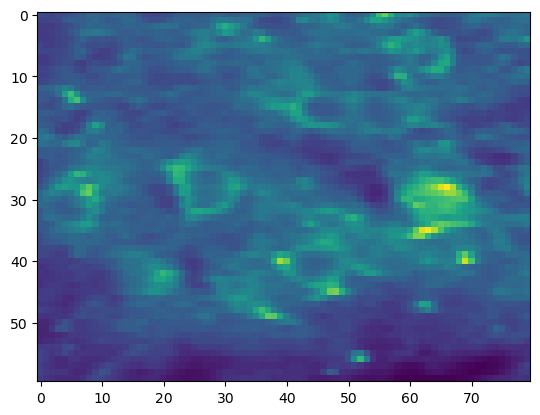

In [6]:
input_movie = df.iloc[0].caiman.get_input_movie(tifffile.imread)
mcorr_movie = df.iloc[0].mcorr.get_output()
plt.imshow(np.mean(mcorr_movie,0))
print(mcorr_movie.shape)
#plt.imshow(np.mean(input_movie,0))

In [29]:
df.iloc[0]["outputs"]

{'mean-projection-path': WindowsPath('e1a6104b-d914-4811-ac70-3861d84c6f74/e1a6104b-d914-4811-ac70-3861d84c6f74_mean_projection.npy'),
 'std-projection-path': WindowsPath('e1a6104b-d914-4811-ac70-3861d84c6f74/e1a6104b-d914-4811-ac70-3861d84c6f74_std_projection.npy'),
 'max-projection-path': WindowsPath('e1a6104b-d914-4811-ac70-3861d84c6f74/e1a6104b-d914-4811-ac70-3861d84c6f74_max_projection.npy'),
 'mcorr-output-path': WindowsPath('e1a6104b-d914-4811-ac70-3861d84c6f74/e1a6104b-d914-4811-ac70-3861d84c6f74-demoMovie_els__d1_60_d2_80_d3_1_order_F_frames_2000.mmap'),
 'corr-img-path': WindowsPath('e1a6104b-d914-4811-ac70-3861d84c6f74/e1a6104b-d914-4811-ac70-3861d84c6f74_cn.npy'),
 'shifts': WindowsPath('e1a6104b-d914-4811-ac70-3861d84c6f74/e1a6104b-d914-4811-ac70-3861d84c6f74_shifts.npy'),
 'success': True,
 'traceback': None}

In [7]:
gSig = 3
#minimal correlation and minimal peak to noise ratio
corr, pnr = correlation_pnr(mcorr_movie[::2], gSig=gSig, swap_dim=False)

In [8]:
#highpass filtering
filt = lambda x: high_pass_filter_space(x, df.iloc[1]["params"]["main"]["gSig_filt"])

funcs = {
    0: filt,
    1: filt
}

iw = ImageWidget(
    [input_movie, mcorr_movie.astype(np.float32)],
    vmin_vmax_sliders=True, 
    #frame_apply=funcs, # the filter func
    names=["input", "mcorr"],
    cmap="gnuplot2",
)

#iw.reset_vmin_vmax()

iw.window_funcs = {"t": (np.mean, 11)}
iw.show()

RFBOutputContext()

Missing extensions: ["VK_KHR_timeline_semaphore"]


In [15]:
iw.plot.canvas.close()

In [16]:
# EZT SE FUTTASD MINDIG
params_cnmf =\
{
    'main': # indicates that these are the "main" params for the CNMF algo
        {
            'fr': 30, # framerate, very important!
            'p': 1,
            'nb': 2,
            'merge_thr': 0.85,
            'rf': 15,
            'stride': 6, # "stride" for cnmf, "strides" for mcorr
            'K': 4,
            'gSig': [4, 4],
            'ssub': 1,
            'tsub': 1,
            'method_init': 'greedy_roi',
            'min_SNR': 2.0,
            'rval_thr': 0.7,
            'use_cnn': True,
            'min_cnn_thr': 0.8,
            'cnn_lowest': 0.1,
            'decay_time': 0.4,
        },
    'refit': True, # If `True`, run a second iteration of CNMF
}

df.caiman.add_item(
    algo='cnmf', # algo is cnmf
    input_movie_path=df.iloc[0],  # use mcorr output from a completed batch item
    params=params_cnmf,
    item_name=df.iloc[0]["item_name"], # use the same item name
)

In [9]:
df

,algo,item_name,input_movie_path,params,outputs,added_time,ran_time,algo_duration,comments,uuid
0,mcorr,demoMovie,example_movies\demoMovie.tif,"{'main': {'gSig_filt': (3, 3), 'pw_rigid': True, 'max_shifts': (5, 5), 'strides': (48, 48), 'overlaps': (24, 24), 'm...",{'mean-projection-path': e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74_mean_projection.n...,2023-05-22T16:09:58,2023-05-22T16:12:02,35.4 sec,None,e1a6104b-d914-4811-ac70-3861d84c6f74
1,cnmf,demoMovie,e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74-demoMovie_els__d1_60_d2_80_d3_1_order_F_fr...,"{'main': {'fr': 30, 'p': 1, 'nb': 2, 'merge_thr': 0.85, 'rf': 15, 'stride': 6, 'K': 4, 'gSig': (4, 4), 'ssub': 1, 't...",{'mean-projection-path': 1445d3ec-4dd3-4ab7-aa1f-fc1ec1c92eb4\1445d3ec-4dd3-4ab7-aa1f-fc1ec1c92eb4_mean_projection.n...,2023-05-22T16:14:29,2023-05-22T16:16:16,48.76 sec,None,1445d3ec-4dd3-4ab7-aa1f-fc1ec1c92eb4


In [18]:
df[
    (df["algo"] == "cnmf") &  # algo
    (df["item_name"] == df.iloc[1]["item_name"])
]

,algo,item_name,input_movie_path,params,outputs,added_time,ran_time,algo_duration,comments,uuid
1,cnmf,demoMovie,e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74-demoMovie_els__d1_60_d2_80_d3_1_order_F_fr...,"{'main': {'fr': 30, 'p': 1, 'nb': 2, 'merge_thr': 0.85, 'rf': 15, 'stride': 6, 'K': 4, 'gSig': (4, 4), 'ssub': 1, 't...",None,2023-05-22T16:14:29,None,None,None,1445d3ec-4dd3-4ab7-aa1f-fc1ec1c92eb4


In [19]:
process = df.iloc[1].caiman.run()
print("ended")

Running 1445d3ec-4dd3-4ab7-aa1f-fc1ec1c92eb4 with local backend
************************************************************************

Starting CNMF item:
algo                                                                                                                                   cnmf
item_name                                                                                                                         demoMovie
input_movie_path    e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74-demoMovie_els__d1_60_d2_80_d3_1_order_F_fr...
params              {'main': {'fr': 30, 'p': 1, 'nb': 2, 'merge_thr': 0.85, 'rf': 15, 'stride': 6, 'K': 4, 'gSig': (4, 4), 'ssub': 1, 't...
outputs                                                                                                                                None
added_time                                                                                                              2023-05-22T16:14:29
ra

In [10]:
df = df.caiman.reload_from_disk()
df

,algo,item_name,input_movie_path,params,outputs,added_time,ran_time,algo_duration,comments,uuid
0,mcorr,demoMovie,example_movies\demoMovie.tif,"{'main': {'gSig_filt': (3, 3), 'pw_rigid': True, 'max_shifts': (5, 5), 'strides': (48, 48), 'overlaps': (24, 24), 'm...",{'mean-projection-path': e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74_mean_projection.n...,2023-05-22T16:09:58,2023-05-22T16:12:02,35.4 sec,None,e1a6104b-d914-4811-ac70-3861d84c6f74
1,cnmf,demoMovie,e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74-demoMovie_els__d1_60_d2_80_d3_1_order_F_fr...,"{'main': {'fr': 30, 'p': 1, 'nb': 2, 'merge_thr': 0.85, 'rf': 15, 'stride': 6, 'K': 4, 'gSig': (4, 4), 'ssub': 1, 't...",{'mean-projection-path': 1445d3ec-4dd3-4ab7-aa1f-fc1ec1c92eb4\1445d3ec-4dd3-4ab7-aa1f-fc1ec1c92eb4_mean_projection.n...,2023-05-22T16:14:29,2023-05-22T16:16:16,48.76 sec,None,1445d3ec-4dd3-4ab7-aa1f-fc1ec1c92eb4


In [11]:
#loading outputs
cnmf_movie = df.iloc[1].caiman.get_input_movie()

contours, coms = df.iloc[1].cnmf.get_contours("all", swap_dim = False)
temporal = df.iloc[1].cnmf.get_temporal("all")

ixs_good = df.iloc[1].cnmf.get_good_components()
ixs_bad = df.iloc[1].cnmf.get_bad_components()

cnmf_obj = df.iloc[1].cnmf.get_output()

Decode mmap filename C:\Users\Huawei\caiman_data\DemoDataPR\e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74-demoMovie_els__d1_60_d2_80_d3_1_order_F_frames_2000.mmap


In [9]:
#ezt nem egészen tudom miért kell
np.sort(cnmf_obj.estimates.r_values)

array([0.39812316, 0.63338666, 0.68258285, 0.74316023, 0.74687225,
       0.78119564, 0.79365479, 0.8310685 , 0.85164253, 0.86324392,
       0.88758055, 0.9111253 , 0.93435995, 0.93538905, 0.94787756,
       0.95750529, 0.96246567, 0.96489924, 0.97180494])

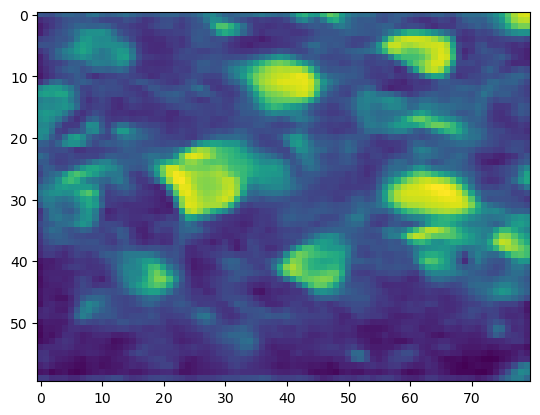

In [13]:
rcm = df.iloc[1].cnmf.get_rcm()
corr_img = df.iloc[1].caiman.get_corr_image()
plt.imshow(corr_img)

In [20]:
# for the image data and contours
iw_cnmf = ImageWidget(cnmf_movie, vmin_vmax_sliders=True, cmap="gnuplot2")

# add good contours to the plot within the widget
contours_graphic = iw_cnmf.plot.add_line_collection(contours, colors="cyan", name="contours")
contours_graphic[ixs_good].colors = "cyan"
contours_graphic[ixs_bad].colors = "magenta"


# temporal plot
plot_temporal = Plot()
#plot_temporal = cnmf.estimates.plot_contours_temporal([temporal], colors="cyan", name="temporal")
#plot_temporal.set_colors(ixs_good, "cyan")
#plot_temporal.set_colors(ixs_bad, "magenta")

temporal_graphic = plot_temporal.add_line_collection(temporal, colors="cyan", name="temporal")
temporal_graphic[ixs_good].colors = "cyan"
temporal_graphic[ixs_bad].colors = "magenta"

# a vertical line that is syncronized to the image widget "t" (timepoint) slider
_ls = LineSlider(x_pos=0, bounds=(temporal.min(), temporal.max()), slider=iw_cnmf.sliders["t"])
plot_temporal.add_graphic(_ls)

# stack them
#VBox([plot_temporal.show(), iw_cnmf.show()])
plot_temporal.show()
iw_cnmf.show()

RFBOutputContext()

RFBOutputContext()

In [21]:
plot_temporal.canvas.close()
iw_cnmf.plot.canvas.close()

In [36]:
# reconstructed movie, A * C
rcm = df.iloc[1].cnmf.get_rcm()
rcm
rcm[100].shape

(60, 80)

RFBOutputContext()


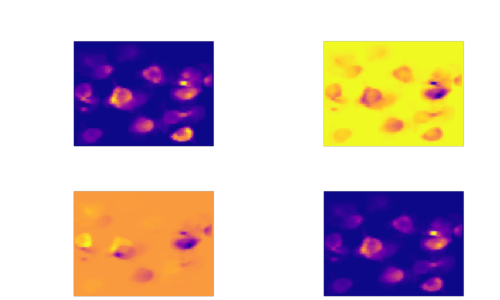

JupyterWgpuCanvas()

In [37]:
gp = GridPlot((2, 2), controllers="sync")

for sp, img in zip(gp, [rcm.max_image, rcm.min_image, rcm.mean_image, rcm.std_image]):
    sp.add_image(img)
    
gp.show()

In [35]:
gp.canvas.close()

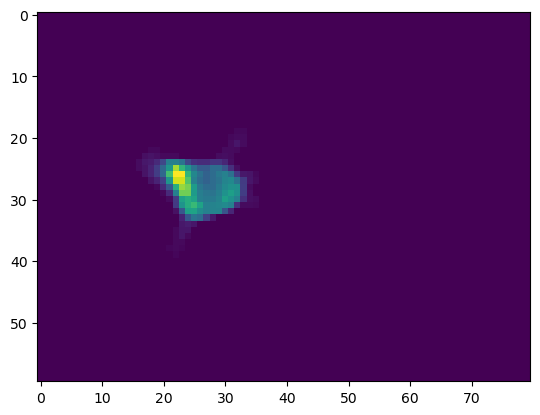

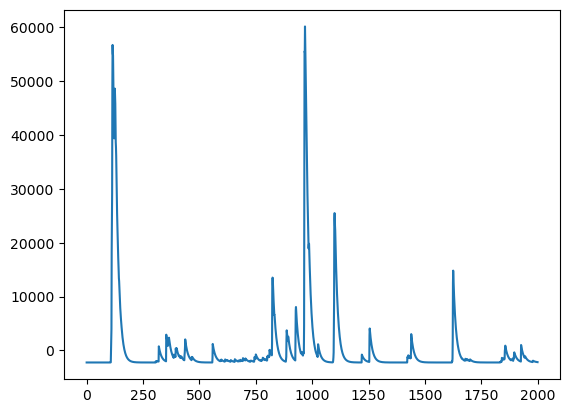

In [41]:
plt.figure();
indi= 5
plt.imshow(np.reshape(cnmf_obj.estimates.A[:,indi].toarray(), (60, 80), order='F'))
plt.figure(); plt.plot(cnmf_obj.estimates.C[indi])

Component:0


<Figure size 640x480 with 0 Axes>

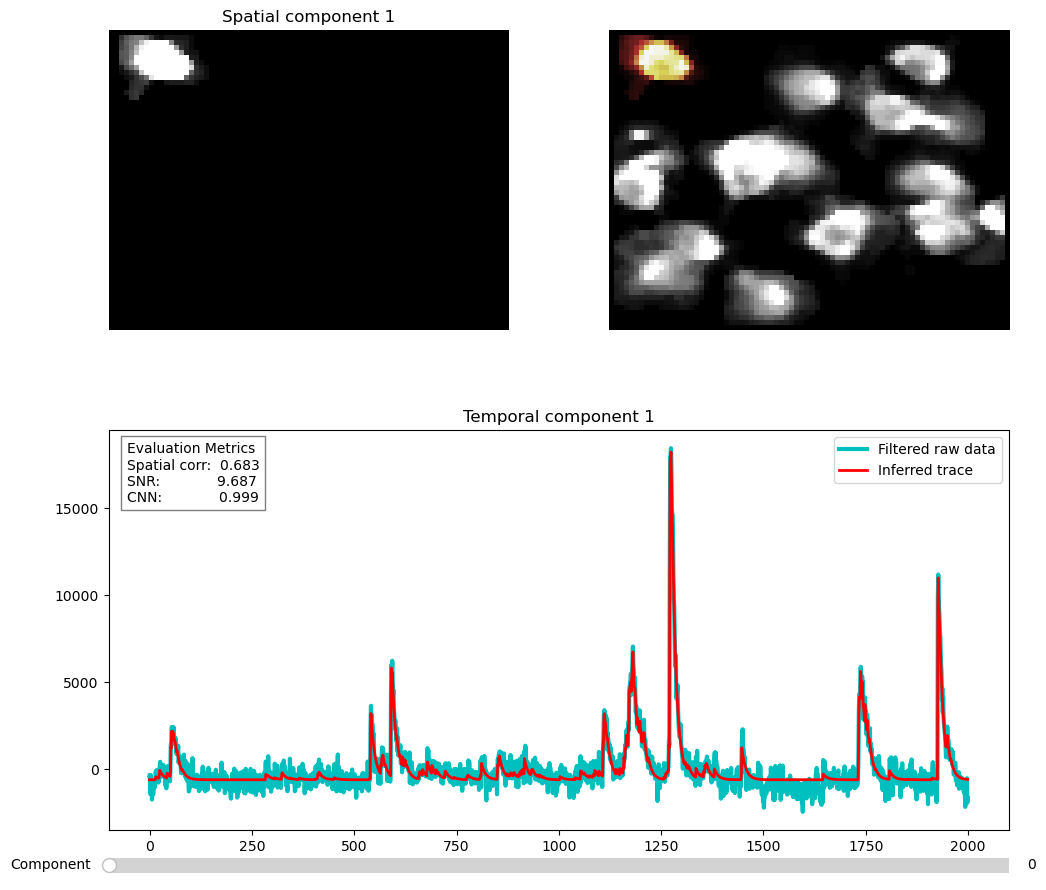

TypeError: Image data of dtype object cannot be converted to float

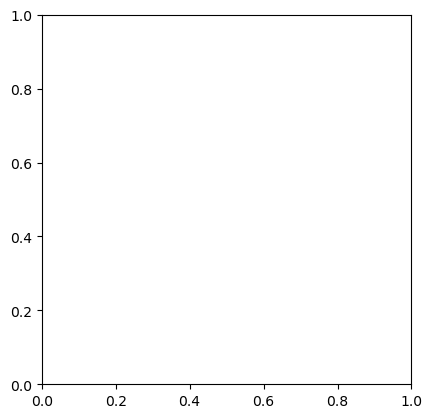

In [49]:
plt.figure();
#plt.imshow(cnmf_obj.estimates.plot_contours())
plt.imshow(cnmf_obj.estimates.view_components())
plt.colorbar()
plt.show()

In [19]:
rcb = df.iloc[1].cnmf.get_rcb()
residuals = df.iloc[1].cnmf.get_residuals()

iw_cnmf_grid = ImageWidget(
    data=[cnmf_movie, rcm, rcb, residuals],
    vmin_vmax_sliders=True,
    cmap="gnuplot2",
    names=["movie", "A * C", "b * f", "residuals"]
)

for subplot in iw_cnmf_grid.plot:
    _contours = subplot.add_line_collection(contours, thickness=1.0, name="contours")
    _contours[ixs_good].colors = "cyan"
    _contours[ixs_bad].colors = "magenta"
    
# temporarily hide bad components
for subplot in iw_cnmf_grid.plot:
    subplot["contours"][ixs_bad].present = False

iw_cnmf_grid.show()

Decode mmap filename C:\Users\Huawei\caiman_data\DemoDataPR\e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74-demoMovie_els__d1_60_d2_80_d3_1_order_F_frames_2000.mmap


RFBOutputContext()

C:\Users\Huawei\anaconda3\envs\mescore\lib\site-packages\mesmerize_core\arrays\_cnmf.py:246: UserWarning: min and max not yet implemented for LazyArrayResiduals. Using first frame of raw movie
  warn("min and max not yet implemented for LazyArrayResiduals. "
C:\Users\Huawei\anaconda3\envs\mescore\lib\site-packages\mesmerize_core\arrays\_cnmf.py:252: UserWarning: min and max not yet implemented for LazyArrayResiduals. Using first frame of raw movie
  warn("min and max not yet implemented for LazyArrayResiduals. "


ERROR:wgpu:Error during handling pointer_move event
Traceback (most recent call last):
  File "C:\Users\Huawei\anaconda3\envs\mescore\lib\site-packages\wgpu\gui\base.py", line 23, in log_exception
    yield
  File "C:\Users\Huawei\anaconda3\envs\mescore\lib\site-packages\wgpu\gui\base.py", line 301, in handle_event
    callback(event)
  File "C:\Users\Huawei\anaconda3\envs\mescore\lib\site-packages\pygfx\renderers\wgpu\_renderer.py", line 780, in convert_event
    info = self.get_pick_info((event["x"], event["y"]))
  File "C:\Users\Huawei\anaconda3\envs\mescore\lib\site-packages\pygfx\renderers\wgpu\_renderer.py", line 667, in get_pick_info
    float_pos = pos[0] / logical_size[0], pos[1] / logical_size[1]
ZeroDivisionError: float division by zero


In [39]:
#VISUALISATION: KICSIT BÉNÁN NÉZ MÉG KI EGYELŐRE
index = 1
cnmf_grid = GridPlot(
    shape=(2, 2), 
    controllers=[[0, 0], [0, 1]], 
    names=[["movie", "rcm"], ["corr", "temporal"]]
)

# movie and rcm, rcm is a lazy array and behaves similar to numpy arrays
movie_graphic = cnmf_grid["movie"].add_image(cnmf_movie[0], cmap="gnuplot2")
rcm_graphic = cnmf_grid["rcm"].add_image(rcm[0], cmap="gnuplot2")

# corr image
cnmf_grid["corr"].add_image(corr_img, cmap="viridis")

# contours for good components
contours_good, coms = df.iloc[index].cnmf.get_contours("good", swap_dim=False)

# random colors for contours and temporal components
# make an RGBA array for each color
rand_colors = np.random.rand(len(contours_good), 4)  # [n_contours, RGBA]
rand_colors[:, -1] = 1 # set alpha = 1

# get temporal of only good components
temporal_good = df.iloc[index].cnmf.get_temporal("good")

# add contours to both movie and rcm subplots
contours_movie = cnmf_grid["movie"].add_line_collection(contours_good, colors=rand_colors)
contours_rcm = cnmf_grid["rcm"].add_line_collection(contours_good, colors=rand_colors)

# line stack of temporal components
temporal_stack = cnmf_grid["temporal"].add_line_stack(temporal_good, colors=rand_colors, thickness=3.0, separate=15)

# plot single temporal, just like before
plot_temporal_single = Plot()
temporal_graphic = plot_temporal_single.add_line_collection(temporal_good, colors=rand_colors)

# since this is a GridPlot and not an ImageWidget we need to define sliders
slider = IntSlider(min=0, max=cnmf_movie.shape[0] - 1, value=0, step=1)

# vertical line sliders
_ls = LineSlider(x_pos=0, bounds=(temporal.min(), temporal.max()), slider=slider)
_ls2 = LineSlider(x_pos=0, bounds=(temporal.min(), temporal.max() + temporal_stack.graphics[-1].position.y), slider=slider)
plot_temporal_single.add_graphic(_ls)
cnmf_grid["temporal"].add_graphic(_ls2)

# function to update each frame
def update_frame(change):
    ix = change["new"]
    movie_graphic.data = cnmf_movie[ix]
    rcm_graphic.data = rcm[ix]
    
slider.observe(update_frame, "value")

@plot_temporal_single.renderer.add_event_handler("resize")
def update_slider_width(*args):
    width, h = plot_temporal_single.renderer.logical_size
    slider.layout = Layout(width=f"{width}px")
    
VBox([plot_temporal_single.show(), cnmf_grid.show(), slider])

RFBOutputContext()

RFBOutputContext()

In [6]:
df

,algo,item_name,input_movie_path,params,outputs,added_time,ran_time,algo_duration,comments,uuid
0,mcorr,demoMovie,example_movies\demoMovie.tif,"{'main': {'gSig_filt': (3, 3), 'pw_rigid': True, 'max_shifts': (5, 5), 'strides': (48, 48), 'overlaps': (24, 24), 'm...",{'mean-projection-path': e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74_mean_projection.n...,2023-05-22T16:09:58,2023-05-22T16:12:02,35.4 sec,None,e1a6104b-d914-4811-ac70-3861d84c6f74
1,cnmf,demoMovie,e1a6104b-d914-4811-ac70-3861d84c6f74\e1a6104b-d914-4811-ac70-3861d84c6f74-demoMovie_els__d1_60_d2_80_d3_1_order_F_fr...,"{'main': {'fr': 30, 'p': 1, 'nb': 2, 'merge_thr': 0.85, 'rf': 15, 'stride': 6, 'K': 4, 'gSig': (4, 4), 'ssub': 1, 't...",{'mean-projection-path': 1445d3ec-4dd3-4ab7-aa1f-fc1ec1c92eb4\1445d3ec-4dd3-4ab7-aa1f-fc1ec1c92eb4_mean_projection.n...,2023-05-22T16:14:29,2023-05-22T16:16:16,48.76 sec,None,1445d3ec-4dd3-4ab7-aa1f-fc1ec1c92eb4
